# Análisis Exploratorio y Regresión Lineal
Stefano Aragoni & Carol Arévalo

## Importar las librerías

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

## Parte 1
### 1.1. Haga una exploración rápida de sus datos para eso haga un resumen de su dataset.

El conjunto de datos proporcionado contiene información sobre juegos de béisbol. Las columnas incluyen:

In [30]:
data = pd.read_csv("baseball_reference_2016_scrape.csv")
pd.set_option('display.max_columns', None)

# Obtener los nombres de las columnas
data.columns.values.tolist()

['attendance',
 'away_team',
 'away_team_errors',
 'away_team_hits',
 'away_team_runs',
 'boxscore_url',
 'date',
 'field_type',
 'game_duration',
 'game_type',
 'home_team',
 'home_team_errors',
 'home_team_hits',
 'home_team_runs',
 'other_info_string',
 'start_time',
 'venue']

Lo que estas columnas nos dicen es que se está almacenando información de cada partido individual. Se almacena información como el equipo local y visitante, la cantidad de errores, hits y runs por equipo, la fecha, el tipo de estadio, duración de juego, hora de inicio, entre otras cosas. 

Asimismo, a continuación se presenta la cantidad de columas y filas del dataset.

In [31]:
#Obtener el número de filas y columnas
print(data.shape)

(2463, 17)


A continuación se presenta el resumen de las columnas mencionadas. Esta imagen presenta información sobre la cantidad de entradas (no vacías) relacionadas a cada columna, así como el tipo de información que almacena.

In [32]:
# Obtener información general sobre el conjunto de data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

Asimismo, se presenta un resumen estadístico de las columnas numéricas, que incluye promedio, desviación estándar, y otros datos.

In [33]:
# Obtener un resumen estadístico de las columnas numéricas
print(data.describe())

       away_team_errors  away_team_hits  away_team_runs  field_type  \
count       2463.000000     2463.000000     2463.000000         0.0   
mean           0.580593        8.764515        4.413723         NaN   
std            0.793391        3.511581        3.104556         NaN   
min            0.000000        1.000000        0.000000         NaN   
25%            0.000000        6.000000        2.000000         NaN   
50%            0.000000        8.000000        4.000000         NaN   
75%            1.000000       11.000000        6.000000         NaN   
max            5.000000       22.000000       21.000000         NaN   

       home_team_errors  home_team_hits  home_team_runs  
count       2463.000000     2463.000000     2463.000000  
mean           0.585871        8.611855        4.519691  
std            0.805542        3.436965        3.111572  
min            0.000000        0.000000        0.000000  
25%            0.000000        6.000000        2.000000  
50%         

Finalmente, a continuación se presentan los nombres de las respectivas columnas, así como los primeros 5 datos almacenados en el dataset.

In [34]:
head = data.head()
print(head)

  attendance              away_team  away_team_errors  away_team_hits  \
0   40,030']          New York Mets                 1               7   
1   21,621']  Philadelphia Phillies                 0               5   
2   12,622']        Minnesota Twins                 0               5   
3   18,531']   Washington Nationals                 0               8   
4   18,572']       Colorado Rockies                 1               8   

   away_team_runs                                       boxscore_url  \
0               3  https://www.baseball-reference.com/boxes/KCA/K...   
1               2  https://www.baseball-reference.com/boxes/CIN/C...   
2               2  https://www.baseball-reference.com/boxes/BAL/B...   
3               3  https://www.baseball-reference.com/boxes/ATL/A...   
4               4  https://www.baseball-reference.com/boxes/ARI/A...   

                       date  field_type game_duration             game_type  \
0     Sunday, April 3, 2016         NaN        : 

### 1.2 Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

![TIPOS VARIABLE](image1.png "Tipos Variable")


### 1.3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

En este caso, el dataset contaba con varios errores de formato. Por tal razón, antes de hacer los gráficos exploratorios, se realizó una limpieza inicial con el propósito de poder tener más control sobre los datos. Asimismo, esto era importante ya que algunos datos numéricos estaban almacenados como "strings", por tal razón era importante modificar el tipo de dato para poder hacer el respectivo análisis.

#### Limpieza Inicial

In [35]:
#Limpiar datos

# formato hora
def to_time(start_time):
    start_time = start_time.replace("Start Time: ", "")
    start_time = start_time.replace(":", " ")
    hour, minute, period, local = [x.strip() for x in start_time.split(" ")]
    hour = int(hour)
    minute = int(minute)
    if period == "p.m." and hour != 12:
        hour += 12
    elif period == "a.m." and hour == 12:
        hour = 0
    return datetime.time(hour, minute)


#Attendance a integer
data['attendance'] = data['attendance'].str.strip("']").str.replace(',','')
data = data[pd.to_numeric(data['attendance'], errors='coerce').notnull()]
data['attendance'] = pd.to_numeric(data['attendance'])

#Quitar columnas que no aportan información
data.dropna(axis=1, how='all', inplace=True) #todas columasn vacias
data.drop(['other_info_string'], axis=1, inplace=True) #vacia
data.drop(['boxscore_url'], axis=1, inplace=True) #url no aporta info

#Pasar duracion a minutos
data['game_duration'] = data['game_duration'].str.replace(':','').astype(int)
data['game_duration'] = data['game_duration'].apply(lambda x: x/100*60 + x%100)

#Quitar los : de la columna venue
data['venue'] = data['venue'].str.replace(':','')

#cambiar tipo de dato de la fecha
data['date'] = pd.to_datetime(data['date'])

#cambiar formato de la hora
data['start_time'] = data['start_time'].apply(to_time)

data.to_csv("modificada.csv", index=False)

#exploarar nuevos datos
data = pd.read_csv("modificada.csv")
print(explore(data, method="summarize"))


                   dtypes  count  null_sum  null_pct  nunique  \
attendance          int64   2460         0       0.0     2374   
away_team          object   2460         0       0.0       30   
away_team_errors    int64   2460         0       0.0        6   
away_team_hits      int64   2460         0       0.0       22   
away_team_runs      int64   2460         0       0.0       20   
date               object   2460         0       0.0      203   
game_duration     float64   2460         0       0.0      168   
game_type          object   2460         0       0.0        4   
home_team          object   2460         0       0.0       30   
home_team_errors    int64   2460         0       0.0        6   
home_team_hits      int64   2460         0       0.0       23   
home_team_runs      int64   2460         0       0.0       18   
start_time         object   2460         0       0.0      207   
venue              object   2460         0       0.0       31   

                        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:29: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Gráficos Exploratorios

La primera gráfica realizada busca determinar la relación entre la asistencia de un juego y el tipo de juego. En este caso, somo se puede observar en la siguiente imagen, los juegos con más asistencia son aquellos realizados durante el día. 

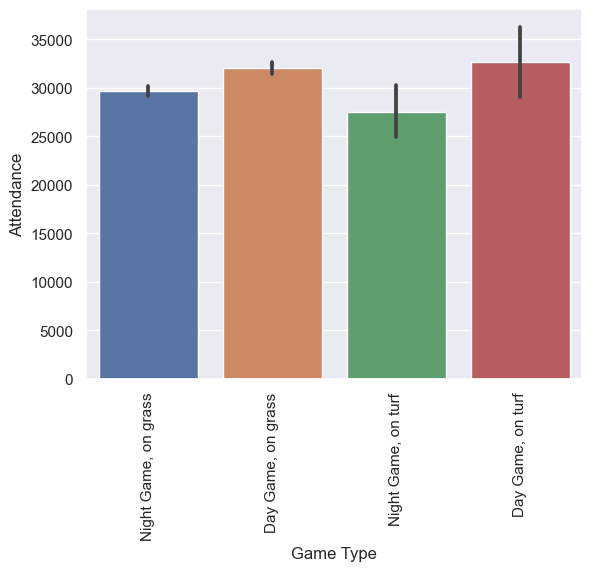

In [36]:
# Attendance vs game tye
sns.barplot(x="game_type", y="attendance", data=data)
plt.xlabel("Game Type")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

La siguiente gráfica busca determinar qué equipo obtiene la mayor cantidad de asistencia como equipo local. Esto es sumamente importante, ya que permite determinar los equipos más populares y conocidos.

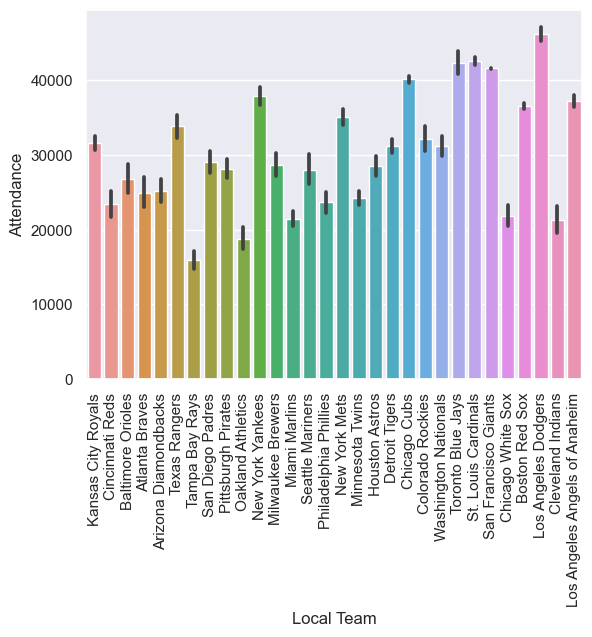

In [37]:
#Attendance vs local team
sns.barplot(x="home_team", y="attendance", data=data)
plt.xlabel("Local Team")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

A continuación se realizó lo mismo con análisis pero con equipos visitantes. En este caso, sin embargo, la mayoría de equipos visitantes tienen una asistencia bastante similar. Esto posiblemente se debe a que no tienen sus fans locales apoyandolos en cualquier lado que vayan, así resultando en que las asistencias sean bastante similar.

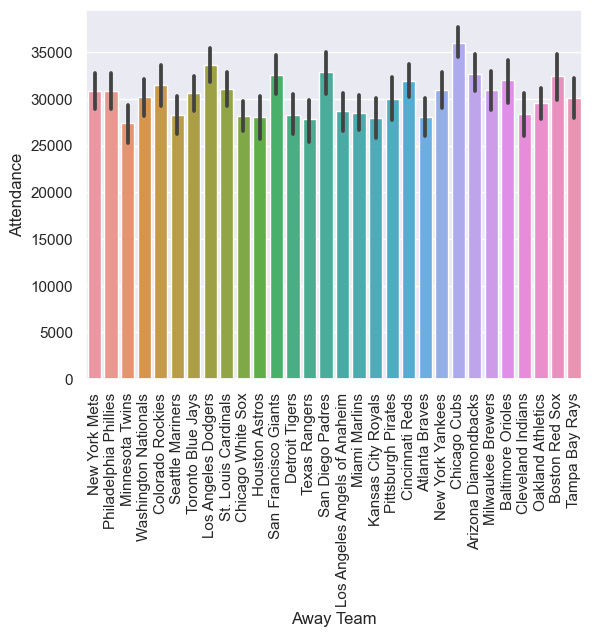

In [39]:
#Attendance vs away team
sns.barplot(x="away_team", y="attendance", data=data)
plt.xlabel("Away Team")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

En la siguiente gráfica se demuestra la cantidad de partidos jugados por los equipos locales. En este caso, se puede observar como los Cleveland Indians y Chicago Clubs son los equipos que más juegos han jugado localmente. Esto siendo muy interesante, ya que como home team, los Cleveland Indians suelen tener muy baja asistencia. Los Chicago Clubs, sin embargo, tienen más asistencia promedio. 

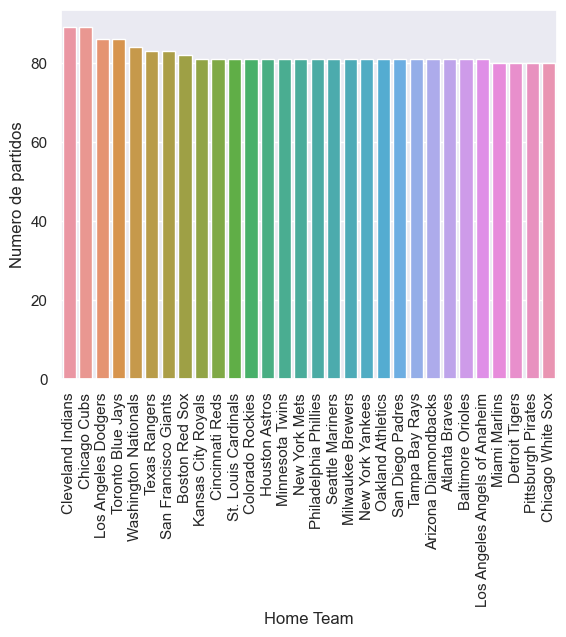

In [40]:
#Most common home team
team_counts = data["home_team"].value_counts()
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.xlabel("Home Team")
plt.ylabel("Numero de partidos")
plt.xticks(rotation=90)
plt.show()

A continuación, se replicó la grafica anterior con Away Team. En este caso, los Chicago Clubs son el equipo que más juegos han particiado en como equipo visitante. Asimismo, los Los Angeles Dodgers también tienen una cantidad similar de partidos jugados. Al comparar estos datos con la asistencia promedio de Away Teams, nos podemos dar cuenta que estos dos equipos tienen la mayor asistencia promedio también. Esto conlleva a la conslusión que estos equipos son muy buenos, juegan bastantes partidos, y son amados por los fans del baseball.

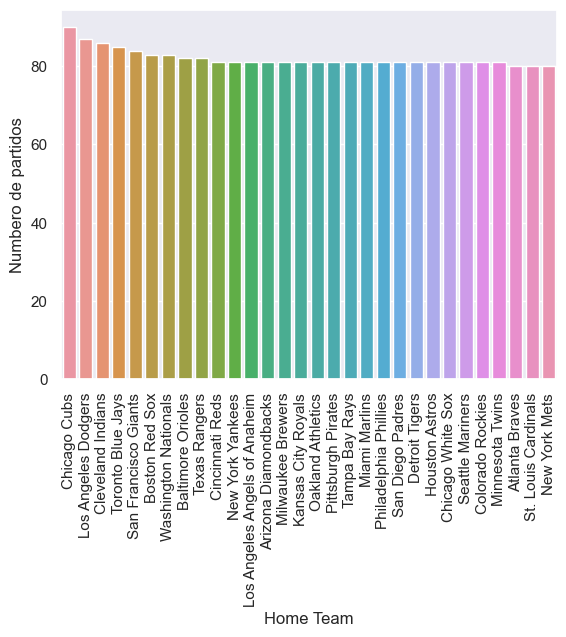

In [41]:
#Most common away team
team_counts = data["away_team"].value_counts()
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.xlabel("Home Team")
plt.ylabel("Numbero de partidos")
plt.xticks(rotation=90)
plt.show()